In [258]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [259]:
train=pd.read_csv('big_mart_sales_train.csv')
test=pd.read_csv('big_mart_sales_test.csv')

In [260]:
train['source']='big_mart_sales_train.csv'
test['source']='big_mart_sales_test.csv'
df = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, df.shape)

(8523, 13) (5681, 12) (14204, 13)


In [261]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,big_mart_sales_train.csv
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,big_mart_sales_train.csv
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,big_mart_sales_train.csv
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,big_mart_sales_train.csv
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,big_mart_sales_train.csv


In [262]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [263]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [265]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [266]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [267]:
mean=df['Item_Weight'].mean()
mean

12.792854228644991

In [268]:
df['Item_Weight'].fillna(mean,inplace=True)

In [269]:
mode=df['Outlet_Size'].mode()
mode[0]

'Medium'

In [270]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [271]:
df['Outlet_Size'].fillna(mode[0],inplace=True)

In [272]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [273]:
mean=df['Item_Outlet_Sales'].mean()
mean

2181.2889135750365

In [274]:
df['Item_Outlet_Sales'].fillna(mean,inplace=True)

In [275]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

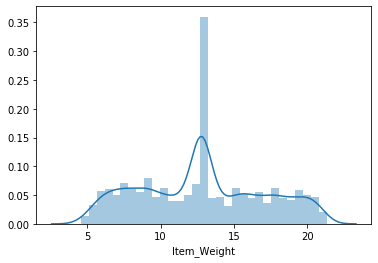

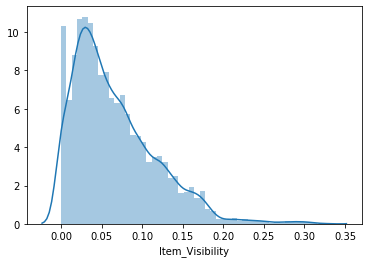

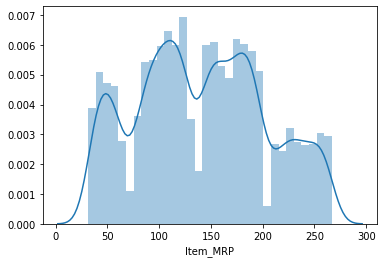

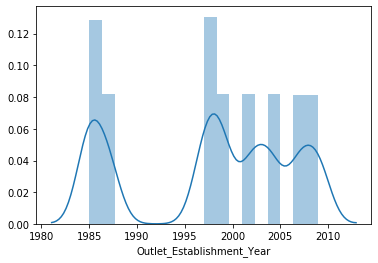

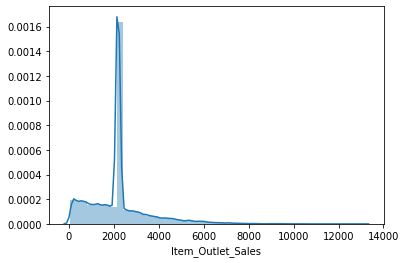

In [276]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

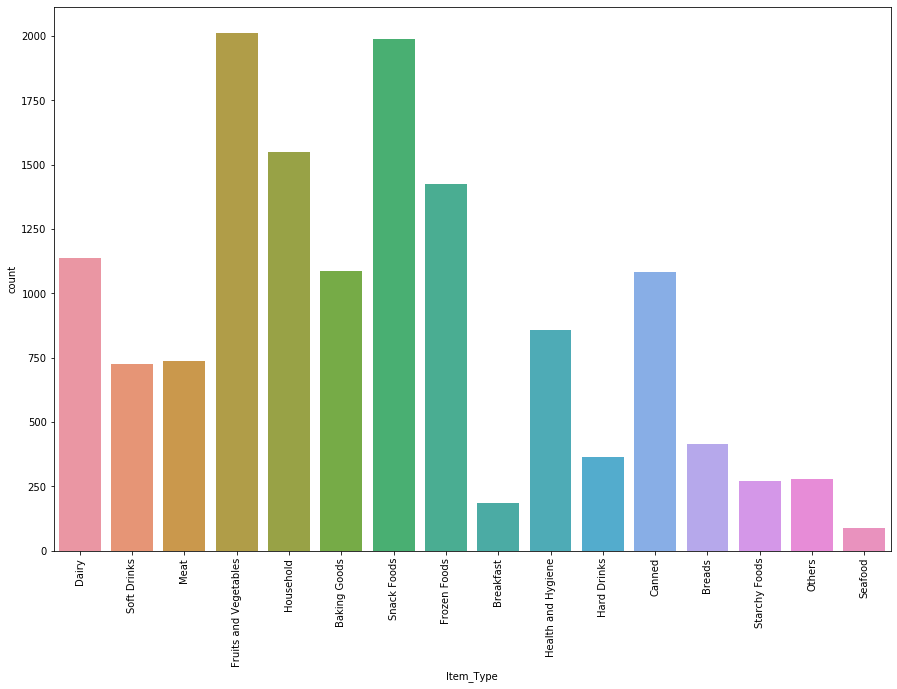

In [277]:
plt.figure(figsize=(15,10))
sns.countplot(df['Item_Type'])
plt.xticks(rotation=90)#visualization of item types by count

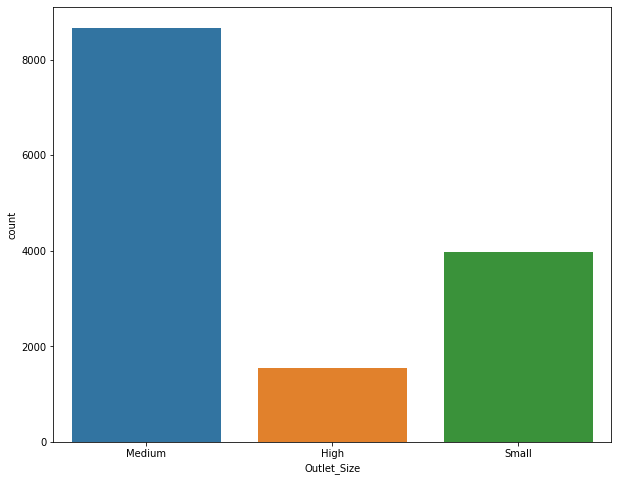

In [278]:
plt.figure(figsize=(10,8))
sns.countplot(df['Outlet_Size'])#visualization of outlet sizes showing there are medium types

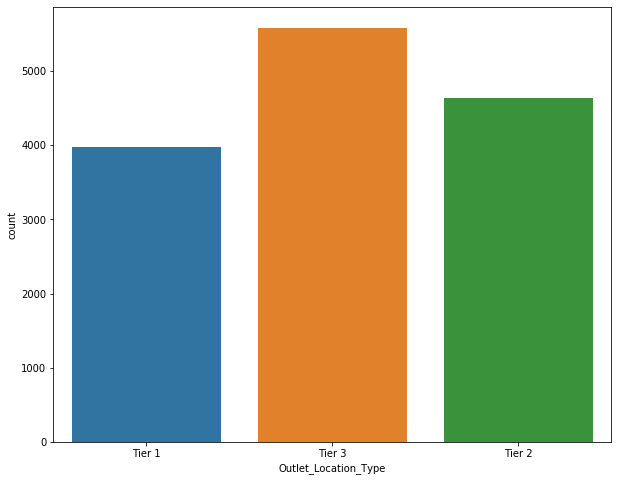

In [279]:
plt.figure(figsize=(10,8))
sns.countplot(df['Outlet_Location_Type'])#tier 3 type store is more

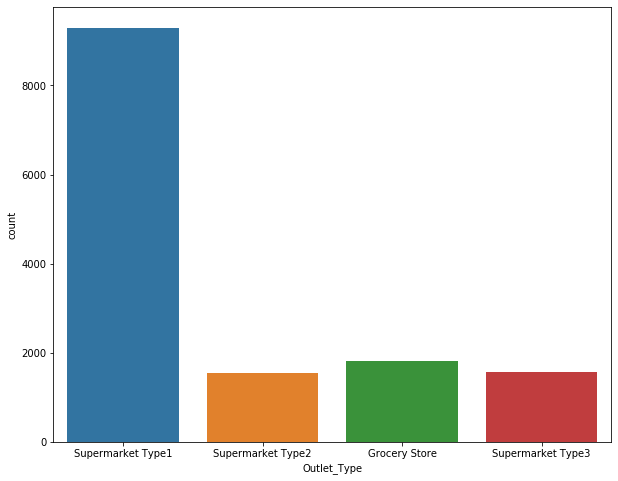

In [280]:
plt.figure(figsize=(10,8))
sns.countplot(df['Outlet_Type'])#supermarket type is most common

In [281]:
#checking distinct entries
np.unique(df['Item_Fat_Content'])

array(['LF', 'Low Fat', 'Regular', 'low fat', 'reg'], dtype=object)

In [282]:
np.unique(df['Item_Type'])

array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)

In [283]:
np.unique(df['Outlet_Identifier'])

array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)

In [284]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [285]:
np.unique(df['Outlet_Type'])

array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)

In [286]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF','Low Fat')

In [287]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat','Low Fat')

In [288]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')

In [289]:
np.unique(df['Item_Fat_Content'])

array(['Low Fat', 'Regular'], dtype=object)

In [304]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content']) 
df['Item_Type'] = le.fit_transform(df['Item_Type']) 
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier']) 
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size']) 
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type']) 
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type']) 

In [305]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,big_mart_sales_train.csv
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,big_mart_sales_train.csv
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,big_mart_sales_train.csv
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,big_mart_sales_train.csv
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,big_mart_sales_train.csv


In [292]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type          object
Outlet_Type                    int32
Item_Outlet_Sales            float64
source                        object
dtype: object

In [255]:
df.drop('Item_Identifier',axis=1,inplace=True) # second thing, if using inplace you dont have to store it in any variable, it will automatically save data within that variable

In [256]:
# df=pd.DataFrame #change df to dataframe

In [293]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# It is showing error because, you cannot plot heatmaps out of anything

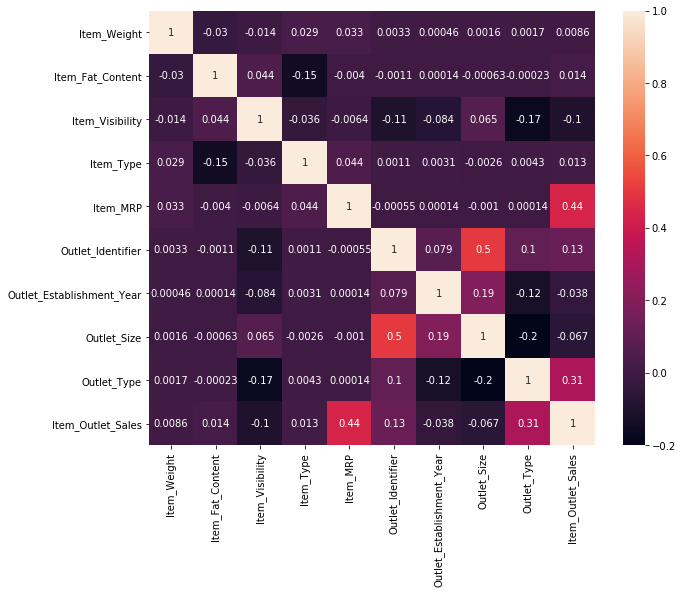

In [300]:
corr = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True)

In [301]:
# sns.heatmap(df) # heat map is best used when you plot the correlation of data

In [306]:
df1 = df.copy(deep = True) #study about deep copy and shallow copy in python, important question

In [307]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int32
Outlet_Type                    int64
Item_Outlet_Sales            float64
source                        object
dtype: object

In [309]:
df = df.drop(["Item_Identifier","source"], axis = 1)

In [310]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(14204, 11)
(13780, 11)


In [311]:
df_new.skew()# checking skewness # remove the skewness using log1p, cbrt, sqrt, square, boxcox, extra: read about negative and positive skewness and how to remove


Item_Weight                  0.110093
Item_Fat_Content             0.618029
Item_Visibility              0.795510
Item_Type                    0.094745
Item_MRP                     0.149494
Outlet_Identifier           -0.065404
Outlet_Establishment_Year   -0.425040
Outlet_Size                 -0.088902
Outlet_Location_Type        -0.201003
Outlet_Type                  0.959037
Item_Outlet_Sales            0.787488
dtype: float64

In [199]:
# train = df_new.loc[df_new['source']=="big_mart_sales_train.csv"]
# test = df_new.loc[df_new['source']=="big_mart_sales_test.csv"]#splitting the datasets

NameError: name 'df_new' is not defined

In [312]:
# test.drop(['Item_Outlet_Sales','source'])
# train.drop(['source'],axis=1,inplace=True)

In [201]:
# train.to_csv("train_modified.csv",index=False)
# test.to_csv("test_modified.csv",index=False)# save the modified model of splitted datasets

In [204]:
# df1=pd.read_csv('train_modified.csv')

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.138000
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.422800
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.270000
3,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.380000
4,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,1,0.013496,13,141.3154,8,1997,2,0,1,2181.288914
14200,7.60,1,0.142991,15,169.1448,3,2009,1,2,2,2181.288914
14201,10.00,0,0.073529,8,118.7440,7,2002,1,1,1,2181.288914
14202,15.30,1,0.000000,3,214.6218,2,2007,1,1,1,2181.288914


In [314]:
x=df.drop(["Item_Outlet_Sales"], axis = 1) # we need not to use inplace as we are storing it in variable
y = df[["Item_Outlet_Sales"]]

In [318]:
y.shape, x.shape

((14204,), (14204, 10))

In [319]:
# y=df1.iloc[:,-2]
# y.head()

In [320]:
from sklearn.model_selection import train_test_split # either use this split, or use the seperate files already provided, dont use both

In [321]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=93,test_size=0.24)

In [329]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
lm = LinearRegression()
def maxr2_score(lm,x,y):
    max_r_score=0
    final_r_state = 0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.24)
        lm=LinearRegression()
        lm.fit(x_train,y_train)
        y_pred=lm.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2_score corresponding to random state; ',r_state,' is: ',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state

    print('max r2 score corresponding to ',final_r_state,' is ',max_r_score)
# calling the function 
maxr2_score(lm,x,y)

r2_score corresponding to random state;  42  is:  0.290642754495239
r2_score corresponding to random state;  43  is:  0.310952202833611
r2_score corresponding to random state;  44  is:  0.2858241766474857
r2_score corresponding to random state;  45  is:  0.2769518399164437
r2_score corresponding to random state;  46  is:  0.32672043443209386
r2_score corresponding to random state;  47  is:  0.30936661797150244
r2_score corresponding to random state;  48  is:  0.30813001081451064
r2_score corresponding to random state;  49  is:  0.3030194563028913
r2_score corresponding to random state;  50  is:  0.30944808832988957
r2_score corresponding to random state;  51  is:  0.2987017622470485
r2_score corresponding to random state;  52  is:  0.3049124454191392
r2_score corresponding to random state;  53  is:  0.2898033196106887
r2_score corresponding to random state;  54  is:  0.3081945896183105
r2_score corresponding to random state;  55  is:  0.2864130310362931
r2_score corresponding to random

In [330]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr_1=KNeighborsRegressor()
gknr=GridSearchCV(knr_1, neighbors, cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 29}

In [331]:
#using knr to check r2 score at different random states
knr=KNeighborsRegressor(n_neighbors=29) 
r_state=maxr2_score(knr,x,y)

r2_score corresponding to random state;  42  is:  0.290642754495239
r2_score corresponding to random state;  43  is:  0.310952202833611
r2_score corresponding to random state;  44  is:  0.2858241766474857
r2_score corresponding to random state;  45  is:  0.2769518399164437
r2_score corresponding to random state;  46  is:  0.32672043443209386
r2_score corresponding to random state;  47  is:  0.30936661797150244
r2_score corresponding to random state;  48  is:  0.30813001081451064
r2_score corresponding to random state;  49  is:  0.3030194563028913
r2_score corresponding to random state;  50  is:  0.30944808832988957
r2_score corresponding to random state;  51  is:  0.2987017622470485
r2_score corresponding to random state;  52  is:  0.3049124454191392
r2_score corresponding to random state;  53  is:  0.2898033196106887
r2_score corresponding to random state;  54  is:  0.3081945896183105
r2_score corresponding to random state;  55  is:  0.2864130310362931
r2_score corresponding to random

In [334]:
#cross validation
from sklearn.model_selection import cross_val_score
print('Mean r2 score for Linear Regression: ',cross_val_score(lm,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Linear Regression: ',cross_val_score(lm,x,y,cv=5,scoring='r2').std())
print()
print('Mean r2 score for KNN Regression: ',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for KNN Regression: ',cross_val_score(knr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Linear Regression:  -1.6164140955168262e+30
Standard deviation in r2 score for Linear Regression:  1.9797364352656404e+30

Mean r2 score for KNN Regression:  -1.5132199290201075e+30
Standard deviation in r2 score for KNN Regression:  1.8536685773309964e+30


In [332]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg, parameters, cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [333]:
#using lasso to check max r2 score at best alpha value
lsreg=Lasso(alpha=1)
r_state=maxr2_score(lsreg,x,y)

r2_score corresponding to random state;  42  is:  0.290642754495239
r2_score corresponding to random state;  43  is:  0.310952202833611
r2_score corresponding to random state;  44  is:  0.2858241766474857
r2_score corresponding to random state;  45  is:  0.2769518399164437
r2_score corresponding to random state;  46  is:  0.32672043443209386
r2_score corresponding to random state;  47  is:  0.30936661797150244
r2_score corresponding to random state;  48  is:  0.30813001081451064
r2_score corresponding to random state;  49  is:  0.3030194563028913
r2_score corresponding to random state;  50  is:  0.30944808832988957
r2_score corresponding to random state;  51  is:  0.2987017622470485
r2_score corresponding to random state;  52  is:  0.3049124454191392
r2_score corresponding to random state;  53  is:  0.2898033196106887
r2_score corresponding to random state;  54  is:  0.3081945896183105
r2_score corresponding to random state;  55  is:  0.2864130310362931
r2_score corresponding to random

In [335]:
#cross validation with lasso
print('Mean r2 score for Lasso Regression: ',cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Lasso Regression: ',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Lasso Regression:  -1.6084618833981866e+30
Standard deviation in r2 score for Lasso Regression:  1.9700250894797115e+30


In [336]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
params={'n_estimators':[10,100,500,1000],'learning_rate':[0.001,0.01,0.1,1]}
clf=GridSearchCV(gbr, params, cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 10}

In [337]:
#cross validation with gbr
gbr=GradientBoostingRegressor(learning_rate=0.001,n_estimators=10)
print('Mean r2 score for GradientBoostingRegression: ',cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for GradientBoostingRegression: ',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())


Mean r2 score for GradientBoostingRegression:  -1.6084618833981866e+30
Standard deviation in r2 score for GradientBoostingRegression:  1.9700250894797115e+30


In [338]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={'n_estimators':[10,100,500,1000],'learning_rate':[0.001,0.01,0.1,1],'base_estimator':[lm,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg, parameters, cv=10)
clf.fit(x,y)
clf.best_params_

{'base_estimator': Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
       positive=False, precompute=False, random_state=None, selection='cyclic',
       tol=0.0001, warm_start=False),
 'learning_rate': 0.001,
 'n_estimators': 10}

In [339]:
#cross validation with AdaBoost
ada_reg=AdaBoostRegressor(base_estimator=DecisionTreeRegressor,learning_rate=0.001,n_estimators=10)
print('Mean r2 score for AdaBoostRegression: ',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for AdaBoostRegression: ',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())

Mean r2 score for AdaBoostRegression:  nan
Standard deviation in r2 score for AdaBoostRegression:  nan


In [340]:
ada_reg=AdaBoostRegressor(base_estimator=DecisionTreeRegressor,learning_rate=0.001,n_estimators=10)
r_state=maxr2_score(ada_reg,x,y)

r2_score corresponding to random state;  42  is:  0.290642754495239
r2_score corresponding to random state;  43  is:  0.310952202833611
r2_score corresponding to random state;  44  is:  0.2858241766474857
r2_score corresponding to random state;  45  is:  0.2769518399164437
r2_score corresponding to random state;  46  is:  0.32672043443209386
r2_score corresponding to random state;  47  is:  0.30936661797150244
r2_score corresponding to random state;  48  is:  0.30813001081451064
r2_score corresponding to random state;  49  is:  0.3030194563028913
r2_score corresponding to random state;  50  is:  0.30944808832988957
r2_score corresponding to random state;  51  is:  0.2987017622470485
r2_score corresponding to random state;  52  is:  0.3049124454191392
r2_score corresponding to random state;  53  is:  0.2898033196106887
r2_score corresponding to random state;  54  is:  0.3081945896183105
r2_score corresponding to random state;  55  is:  0.2864130310362931
r2_score corresponding to random